In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data1 = pd.read_csv(r'D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\Laborales\G2\raw_60min_comparision_2.csv')

ds_data = data1[['DATE & TIME','WELL', 'Choke [/64]', 'FSF Line Press [Psig]',
       'FSF Line Temp [C]', 'FSF Gas Rate [sm3/d]', 
       'FSF Oil Rate [sm3/d]', 'FSF RAW Oil Rate [m3/d]',
       'FSF Water Rate [sm3/d]', 'FSF Liquid [sm3/d]',
       'SEP Gas Rate [sm3/d]', 'SEP Oil Flow [sm3/d]',
       'SEP RAW Oil Flow [m3/d]', 'SEP Water Flow Rate [sm3/d]',
          'SEP liquid [sm3/d]',       
        'Gas Flow Diff (abs)','Liquid Flow Dif (abs)','Oil Flow Diff (abs)', 'Water Flow Diff (abs)']]

ds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 19 columns):
DATE & TIME                    1428 non-null object
WELL                           1428 non-null object
Choke [/64]                    1428 non-null int64
FSF Line Press [Psig]          1428 non-null float64
FSF Line Temp [C]              1428 non-null float64
FSF Gas Rate [sm3/d]           1428 non-null float64
FSF Oil Rate [sm3/d]           1428 non-null float64
FSF RAW Oil Rate [m3/d]        1428 non-null float64
FSF Water Rate [sm3/d]         1428 non-null float64
FSF Liquid [sm3/d]             1428 non-null float64
SEP Gas Rate [sm3/d]           1428 non-null float64
SEP Oil Flow [sm3/d]           1428 non-null float64
SEP RAW Oil Flow [m3/d]        1428 non-null float64
SEP Water Flow Rate [sm3/d]    1428 non-null float64
SEP liquid [sm3/d]             1428 non-null float64
Gas Flow Diff (abs)            1427 non-null float64
Liquid Flow Dif (abs)          1428 non-null floa

Some EDA process, reading and Exploring the dataset

In [3]:
data1.columns

Index(['DATE & TIME', 'WELL', 'Choke [/64]', 'FSF Line Press [Psig]',
       'FSF Line Temp [C]', 'FSF Gas Rate [sm3/d]', 'FSF Gas Vol [sm3]',
       'GOR [sm3/sm3]', 'FSF Oil Rate [sm3/d]', 'FSF RAW Oil Rate [m3/d]',
       'FSF Oil Vol [sm3]', 'FSF Water Rate [sm3/d]', 'FSF Water Vol [sm3]',
       'FSF WC [%]', 'FSF Liquid [sm3/d]', 'SEP Gas Rate [sm3/d]',
       'SEP Gas Cumm. [sm3]', 'SEP GOR (Gas/Oil Ratio)',
       'SEP Oil Density [g/cm3]', 'SEP Oil Flow [sm3/d]',
       'SEP RAW Oil Flow [m3/d]', 'SEP Water Flow Rate [sm3/d]',
       'SEP liquid [sm3/d]', 'Gas Flow Diff (abs)', 'Liquid Flow Dif (abs)',
       'Oil Flow Diff (abs)', 'Water Flow Diff (abs)'],
      dtype='object')

In [4]:

ds_data['Choke [/64]'] = ds_data['Choke [/64]'].astype('str')
print(ds_data.dtypes)


DATE & TIME                     object
WELL                            object
Choke [/64]                     object
FSF Line Press [Psig]          float64
FSF Line Temp [C]              float64
FSF Gas Rate [sm3/d]           float64
FSF Oil Rate [sm3/d]           float64
FSF RAW Oil Rate [m3/d]        float64
FSF Water Rate [sm3/d]         float64
FSF Liquid [sm3/d]             float64
SEP Gas Rate [sm3/d]           float64
SEP Oil Flow [sm3/d]           float64
SEP RAW Oil Flow [m3/d]        float64
SEP Water Flow Rate [sm3/d]    float64
SEP liquid [sm3/d]             float64
Gas Flow Diff (abs)            float64
Liquid Flow Dif (abs)          float64
Oil Flow Diff (abs)            float64
Water Flow Diff (abs)          float64
dtype: object


C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
ds_data.isnull().sum()

DATE & TIME                    0
WELL                           0
Choke [/64]                    0
FSF Line Press [Psig]          0
FSF Line Temp [C]              0
FSF Gas Rate [sm3/d]           0
FSF Oil Rate [sm3/d]           0
FSF RAW Oil Rate [m3/d]        0
FSF Water Rate [sm3/d]         0
FSF Liquid [sm3/d]             0
SEP Gas Rate [sm3/d]           0
SEP Oil Flow [sm3/d]           0
SEP RAW Oil Flow [m3/d]        0
SEP Water Flow Rate [sm3/d]    0
SEP liquid [sm3/d]             0
Gas Flow Diff (abs)            1
Liquid Flow Dif (abs)          0
Oil Flow Diff (abs)            0
Water Flow Diff (abs)          0
dtype: int64

In [6]:
ds_data=ds_data[ds_data["Gas Flow Diff (abs)"].notnull()]

Flowing Trends

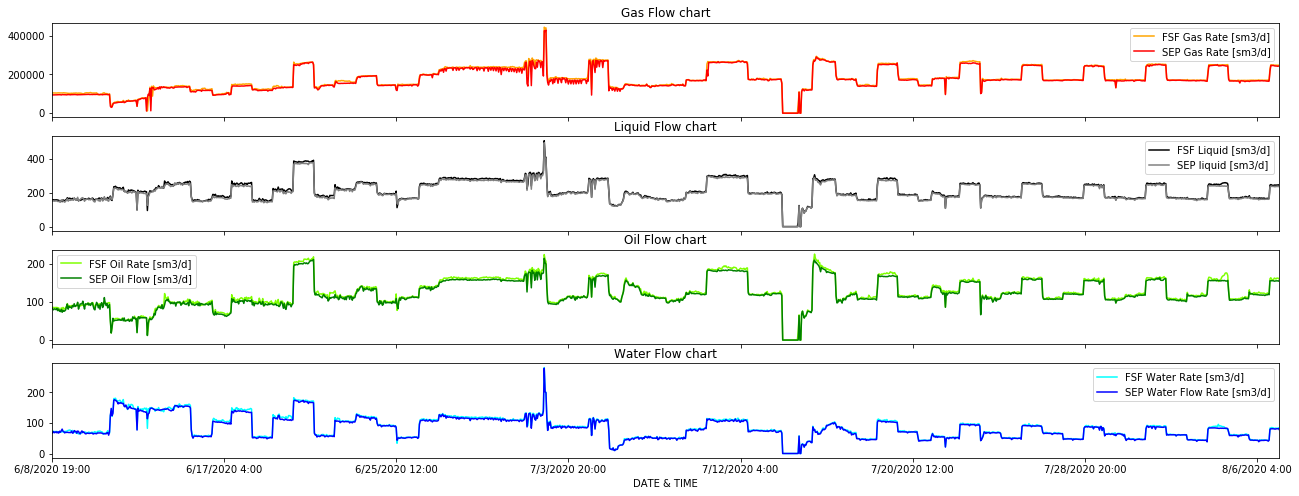

In [7]:
#ds_data['DATE & TIME'] = pd.to_datetime(ds_data['DATE & TIME'])
#ds_Qf.dtypes
fig, ax = plt.subplots(4,figsize=(22,8),sharex=True)
ds_data.plot(x='DATE & TIME', y=['FSF Gas Rate [sm3/d]','SEP Gas Rate [sm3/d]'],color=['orange','red'],ax=ax[0])
ds_data.plot(x='DATE & TIME', y=['FSF Liquid [sm3/d]','SEP liquid [sm3/d]'],color=['black','gray'],ax=ax[1])
ds_data.plot(x='DATE & TIME', y=['FSF Oil Rate [sm3/d]','SEP Oil Flow [sm3/d]'],color=['chartreuse','green'],ax=ax[2])
ds_data.plot(x='DATE & TIME', y=['FSF Water Rate [sm3/d]','SEP Water Flow Rate [sm3/d]'],color=['aqua','blue'],ax=ax[3])
ax[0].set(title="Gas Flow chart")
ax[1].set(title="Liquid Flow chart")
ax[2].set(title="Oil Flow chart")
ax[3].set(title="Water Flow chart")
plt.show()

Smoothing information using 24hs average intervals

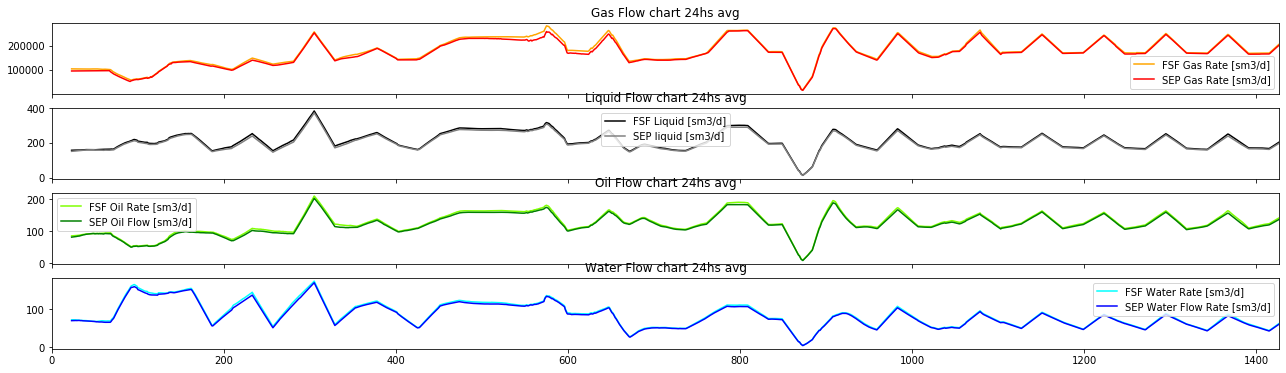

In [4]:
#ds_rectified = ds_data.drop(['DATE & TIME','WELL','Choke [/64]','well+choke'], axis=1)
ds_rectified = ds_data.drop(['DATE & TIME','WELL','Choke [/64]'], axis=1)
ds_rectified = ds_rectified.apply(np.abs)
ds_envelope = ds_rectified.rolling(24).mean()

fig, ax = plt.subplots(4,figsize=(22,6),sharex=True)
ds_envelope.plot(y=['FSF Gas Rate [sm3/d]','SEP Gas Rate [sm3/d]'], color=['orange','red'],ax=ax[0])
ds_envelope.plot(y=['FSF Liquid [sm3/d]','SEP liquid [sm3/d]'],color=['black','gray'],ax=ax[1])
ds_envelope.plot(y=['FSF Oil Rate [sm3/d]','SEP Oil Flow [sm3/d]'], color=['chartreuse','green'],ax=ax[2])
ds_envelope.plot(y=['FSF Water Rate [sm3/d]','SEP Water Flow Rate [sm3/d]'],color=['aqua','blue'],ax=ax[3])
ax[0].set(title="Gas Flow chart 24hs avg")
ax[1].set(title="Liquid Flow chart 24hs avg")
ax[2].set(title="Oil Flow chart 24hs avg")
ax[3].set(title="Water Flow chart 24hs avg")
plt.show()

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


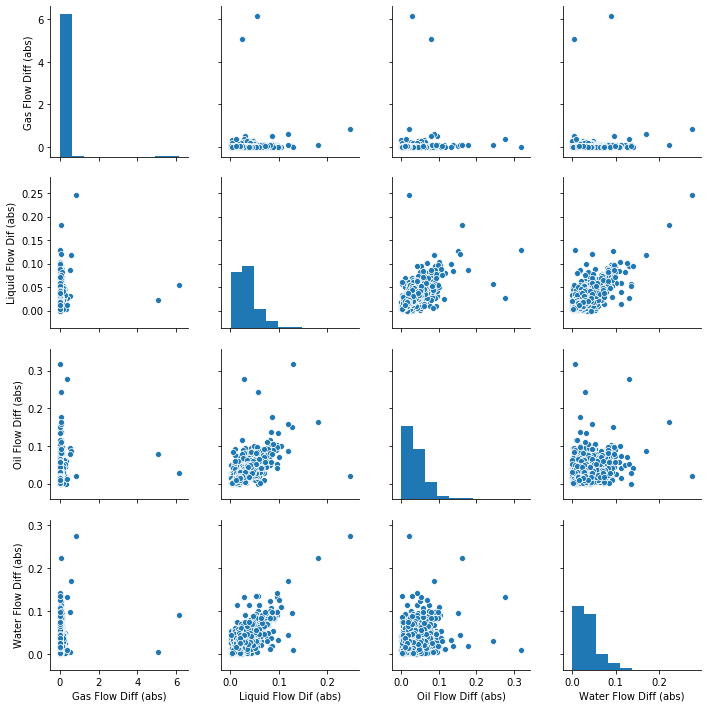

In [15]:
sns.pairplot(ds_data[['Gas Flow Diff (abs)', 'Liquid Flow Dif (abs)','Oil Flow Diff (abs)','Water Flow Diff (abs)']], diag_kind="hist")

Preliminar performance information

In [4]:
ds_data[['Gas Flow Diff (abs)', 'Liquid Flow Dif (abs)','Oil Flow Diff (abs)','Water Flow Diff (abs)']].describe()

,Gas Flow Diff (abs),Liquid Flow Dif (abs),Oil Flow Diff (abs),Water Flow Diff (abs)
count,1163.000000,1164.000000,1164.000000,1164.000000
mean,0.046795,0.031291,0.033175,0.032527
std,0.238499,0.021082,0.027618,0.025519
min,0.000000,0.000000,0.000000,0.000000
25%,0.010238,0.017639,0.014783,0.014655
50%,0.021393,0.027653,0.028721,0.028588
75%,0.044321,0.040085,0.044177,0.044023
max,6.149201,0.246715,0.318623,0.274868


Cleaning outliers 

In [8]:
min = .01
max = .99

x = ds_data[ds_data['Gas Flow Diff (abs)'].between(ds_data['Gas Flow Diff (abs)'].quantile(min), ds_data['Gas Flow Diff (abs)'].quantile(max))] # without outliers

x.loc[:,'Gas Flow Diff (tot)'] = ((x['FSF Gas Rate [sm3/d]'] - x['SEP Gas Rate [sm3/d]'])/x['SEP Gas Rate [sm3/d]'])
x.loc[:,'Liquid Flow Dif (tot)'] = ((x['FSF Liquid [sm3/d]'] - x['SEP liquid [sm3/d]'])/x['SEP liquid [sm3/d]'])
x.loc[:,'Oil Flow Diff (tot)'] = ((x['FSF Oil Rate [sm3/d]'] - x['SEP Oil Flow [sm3/d]'])/x['SEP Oil Flow [sm3/d]'])
x.loc[:,'Water Flow Diff (tot)'] = ((x['FSF Water Rate [sm3/d]'] - x['SEP Water Flow Rate [sm3/d]'])/x['SEP Water Flow Rate [sm3/d]'])

x = x[x['Gas Flow Diff (tot)'].between(x['Gas Flow Diff (tot)'].quantile(min), x['Gas Flow Diff (tot)'].quantile(max))] 

ds_data.loc[:,'Gas Flow Diff (tot)'] = ((ds_data['FSF Gas Rate [sm3/d]'] - ds_data['SEP Gas Rate [sm3/d]'])/ds_data['SEP Gas Rate [sm3/d]'])
ds_data.loc[:,'Liquid Flow Dif (tot)'] = ((ds_data['FSF Liquid [sm3/d]'] - ds_data['SEP liquid [sm3/d]'])/ds_data['SEP liquid [sm3/d]'])
ds_data.loc[:,'Oil Flow Diff (tot)'] = ((ds_data['FSF Oil Rate [sm3/d]'] - ds_data['SEP Oil Flow [sm3/d]'])/ds_data['SEP Oil Flow [sm3/d]'])
ds_data.loc[:,'Water Flow Diff (tot)'] = ((ds_data['FSF Water Rate [sm3/d]'] - ds_data['SEP Water Flow Rate [sm3/d]'])/ds_data['SEP Water Flow Rate [sm3/d]'])

#ds_data[['Gas Flow Diff (abs)', 'Liquid Flow Dif (abs)','Oil Flow Diff (abs)','Water Flow Diff (abs)','Gas Flow Diff (tot)', 'Liquid Flow Dif (tot)','Oil Flow Diff (tot)','Water Flow Diff (tot)']].describe()

x[['Gas Flow Diff (abs)', 'Liquid Flow Dif (abs)','Oil Flow Diff (abs)','Water Flow Diff (abs)','Gas Flow Diff (tot)', 'Liquid Flow Dif (tot)','Oil Flow Diff (tot)','Water Flow Diff (tot)']].describe()



C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Gas Flow Diff (abs),Liquid Flow Dif (abs),Oil Flow Diff (abs),Water Flow Diff (abs),Gas Flow Diff (tot),Liquid Flow Dif (tot),Oil Flow Diff (tot),Water Flow Diff (tot)
count,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000
mean,0.029114,0.030681,0.032180,0.031491,0.029082,0.029432,0.030135,0.029366
std,0.028749,0.018471,0.025103,0.023048,0.028781,0.020405,0.027525,0.025703
min,0.000016,0.000136,0.000003,0.000205,-0.007038,-0.181638,-0.162458,-0.222927
25%,0.010019,0.017975,0.015090,0.014610,0.010019,0.017580,0.013912,0.013479
50%,0.019062,0.027480,0.028466,0.028204,0.019062,0.027030,0.027629,0.027427
75%,0.038790,0.039056,0.042945,0.042621,0.038790,0.038733,0.042375,0.042127
max,0.172410,0.181638,0.318623,0.222927,0.172410,0.128679,0.318623,0.155061


In [9]:
ds_data[['Gas Flow Diff (abs)', 'Liquid Flow Dif (abs)','Oil Flow Diff (abs)','Water Flow Diff (abs)','Gas Flow Diff (tot)', 'Liquid Flow Dif (tot)','Oil Flow Diff (tot)','Water Flow Diff (tot)']].describe()


,Gas Flow Diff (abs),Liquid Flow Dif (abs),Oil Flow Diff (abs),Water Flow Diff (abs),Gas Flow Diff (tot),Liquid Flow Dif (tot),Oil Flow Diff (tot),Water Flow Diff (tot)
count,1427.000000,1427.000000,1427.000000,1427.000000,1407.000000,1407.000000,1407.000000,1407.000000
mean,0.041188,0.030584,0.032210,0.031458,inf,inf,inf,inf
std,0.215670,0.019978,0.026374,0.024736,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,-0.857588,-0.246715,-0.277528,-0.274868
25%,0.009877,0.017574,0.014744,0.013752,0.009877,0.017525,0.013682,0.013161
50%,0.019094,0.027093,0.028048,0.027936,0.019187,0.027033,0.027713,0.027348
75%,0.040114,0.039056,0.043099,0.042736,0.040262,0.038806,0.042811,0.042365
max,6.149201,0.246715,0.318623,0.274868,inf,inf,inf,inf


In [7]:
x.describe()

,FSF Line Press [Psig],FSF Line Temp [C],FSF Gas Rate [sm3/d],FSF Oil Rate [sm3/d],FSF RAW Oil Rate [m3/d],FSF Water Rate [sm3/d],FSF Liquid [sm3/d],SEP Gas Rate [sm3/d],SEP Oil Flow [sm3/d],SEP RAW Oil Flow [m3/d],SEP Water Flow Rate [sm3/d],SEP liquid [sm3/d],Gas Flow Diff (abs),Liquid Flow Dif (abs),Oil Flow Diff (abs),Water Flow Diff (abs),Gas Flow Diff (tot),Liquid Flow Dif (tot),Oil Flow Diff (tot),Water Flow Diff (tot)
count,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000
mean,1386.321224,55.845169,180956.105312,127.269339,198.423322,85.952724,213.222063,176307.274303,123.580977,197.810623,83.471591,207.052142,0.029114,0.030681,0.032180,0.031491,0.029082,0.029432,0.030135,0.029366
std,24.239204,5.747792,55190.022602,34.083370,52.347956,34.860597,54.518886,54698.879126,32.947303,51.883626,33.794760,52.548750,0.028749,0.018471,0.025103,0.023048,0.028781,0.020405,0.027525,0.025703
min,915.760000,28.320000,32653.580000,18.388300,30.450051,10.547800,79.623125,29935.540000,18.550000,30.916667,10.490000,78.670000,0.000016,0.000136,0.000003,0.000205,-0.007038,-0.181638,-0.162458,-0.222927
25%,1376.380000,52.050000,144384.533400,106.937500,166.045047,56.609400,169.115025,140665.117500,103.697500,164.691778,54.777500,165.420000,0.010019,0.017975,0.015090,0.014610,0.010019,0.017580,0.013912,0.013479
50%,1388.030000,55.380000,171898.175250,119.237850,188.444074,79.754200,196.666475,169228.955000,116.165000,185.017589,77.635000,192.415000,0.019062,0.027480,0.028466,0.028204,0.019062,0.027030,0.027629,0.027427
75%,1397.072500,61.162500,236908.694000,158.483900,229.583809,110.493750,254.601300,230337.717500,155.352500,246.679688,106.975000,247.507500,0.038790,0.039056,0.042945,0.042621,0.038790,0.038733,0.042375,0.042127
max,1440.880000,65.790000,443725.660000,225.874200,356.774917,281.420700,506.086300,428624.150000,214.800000,336.142857,279.230000,494.030000,0.172410,0.181638,0.318623,0.222927,0.172410,0.128679,0.318623,0.155061


Performance Analisys 

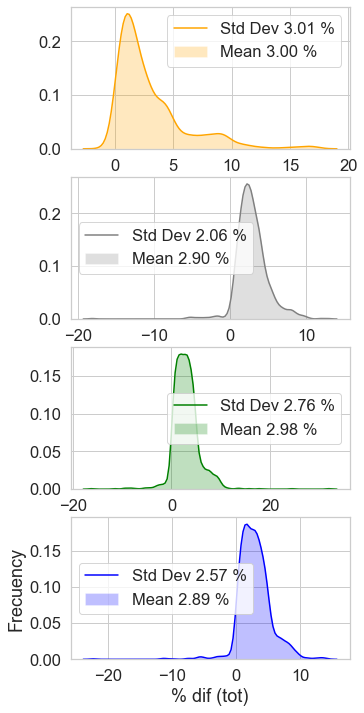

In [6]:
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

fig, ax = plt.subplots(4,sharex=False,figsize=(5,12))

x1 = x['Gas Flow Diff (tot)'] * 100
x2 = x['Liquid Flow Dif (tot)'] * 100
x3 = x['Oil Flow Diff (tot)'] * 100
x4 = x['Water Flow Diff (tot)'] * 100

mean1 = np.mean(x['Gas Flow Diff (tot)']) * 100
std1 = np.std(x['Gas Flow Diff (tot)']) 
label1 = "{:.2f}".format(std1*100)
label2 = "{:.2f}".format(mean1)
#dist1 = np.random.normal(mean1, std1, size=100)
#ax[0].hist(x1, color='orange', bins='auto', label="label")
sns.kdeplot(x1, color='orange', shade=True, label="label", ax=ax[0])
labels= ["Std Dev "+label1+" %", "Mean "+label2+" %"]
ax[0].legend(labels)

plt.ylabel('Frecuency')
mean1 = np.mean(x['Liquid Flow Dif (tot)']) * 100
std1 = np.std(x['Liquid Flow Dif (tot)']) 
label1 = "{:.2f}".format(std1*100)
label2 = "{:.2f}".format(mean1)
sns.kdeplot(x2, color='gray', shade=True, label="label", ax=ax[1])
labels= ["Std Dev "+label1+" %", "Mean "+label2+" %"]
ax[1].legend(labels)

plt.ylabel('Frecuency')
mean1 = np.mean(x['Oil Flow Diff (tot)']) * 100
std1 = np.std(x['Oil Flow Diff (tot)']) 
label1 = "{:.2f}".format(std1*100)
label2 = "{:.2f}".format(mean1)
sns.kdeplot(x3, color='green', shade=True, label="label", ax=ax[2])
labels= ["Std Dev "+label1+" %", "Mean "+label2+" %"]
ax[2].legend(labels)

mean1 = np.mean(x['Water Flow Diff (tot)']) * 100
std1 = np.std(x['Water Flow Diff (tot)']) 
label1 = "{:.2f}".format(std1*100)
label2 = "{:.2f}".format(mean1)
plt.ylabel('Frecuency')
sns.kdeplot(x4, color='blue', shade=True, label="label", ax=ax[3])
plt.xlabel('% dif (tot)')
plt.ylabel('Frecuency')

labels= ["Std Dev "+label1+" %", "Mean "+label2+" %"]
ax[3].legend(labels)
plt.show()

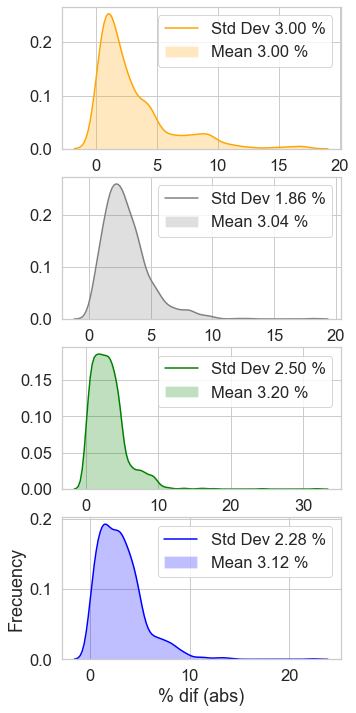

In [11]:
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

fig, ax = plt.subplots(4,sharex=False,figsize=(5,12))

x1 = x['Gas Flow Diff (abs)'] * 100
x2 = x['Liquid Flow Dif (abs)'] * 100
x3 = x['Oil Flow Diff (abs)'] * 100
x4 = x['Water Flow Diff (abs)'] * 100

mean1 = np.mean(x['Gas Flow Diff (abs)']) * 100
std1 = np.std(x['Gas Flow Diff (abs)']) 
label1 = "{:.2f}".format(std1*100)
label2 = "{:.2f}".format(mean1)
sns.kdeplot(x1, color='orange', shade=True, label="label", ax=ax[0])
labels= ["Std Dev "+label1+" %", "Mean "+label2+" %"]
ax[0].legend(labels)

plt.ylabel('Frecuency')
mean1 = np.mean(x['Liquid Flow Dif (abs)']) * 100
std1 = np.std(x['Liquid Flow Dif (abs)']) 
label1 = "{:.2f}".format(std1*100)
label2 = "{:.2f}".format(mean1)
sns.kdeplot(x2, color='gray', shade=True, label="label", ax=ax[1])
labels= ["Std Dev "+label1+" %", "Mean "+label2+" %"]
ax[1].legend(labels)

plt.ylabel('Frecuency')
mean1 = np.mean(x['Oil Flow Diff (abs)']) * 100
std1 = np.std(x['Oil Flow Diff (abs)']) 
label1 = "{:.2f}".format(std1*100)
label2 = "{:.2f}".format(mean1)
#dist1 = np.random.normal(mean1, std1, size=100000)
sns.kdeplot(x3, color='green', shade=True, label="label", ax=ax[2])
labels= ["Std Dev "+label1+" %", "Mean "+label2+" %"]
ax[2].legend(labels)

mean1 = np.mean(x['Water Flow Diff (abs)']) * 100
std1 = np.std(x['Water Flow Diff (abs)']) 
label1 = "{:.2f}".format(std1*100)
label2 = "{:.2f}".format(mean1)
plt.ylabel('Frecuency')
#dist1 = np.random.normal(mean1, std1, size=100000)
sns.kdeplot(x4, color='blue', shade=True, label="label", ax=ax[3])
plt.xlabel('% dif (abs)')
plt.ylabel('Frecuency')

labels= ["Std Dev "+label1+" %", "Mean "+label2+" %"]
ax[3].legend(labels)
plt.show()

[]

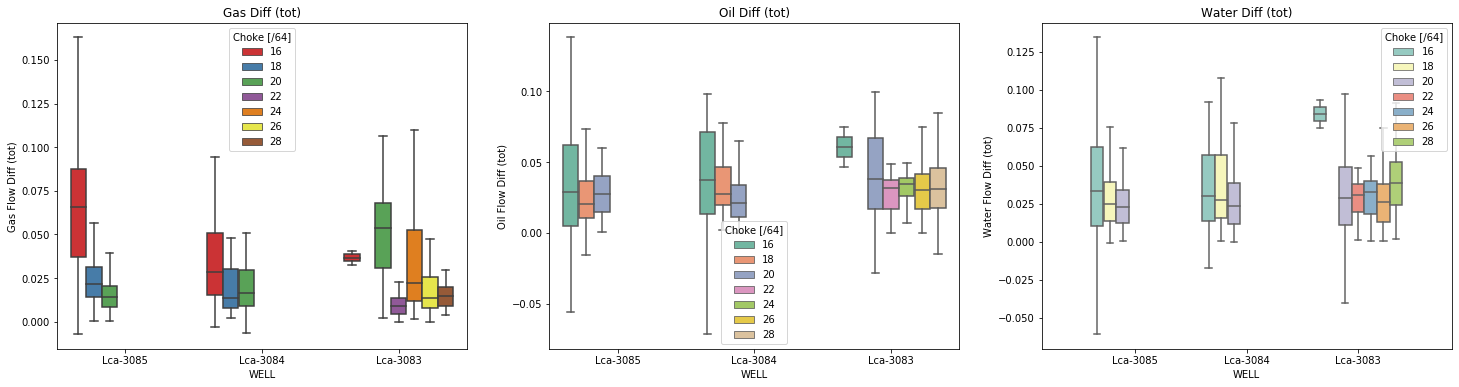

In [10]:
"""ds_data['Gas Flow Diff (tot)'] = ((ds_data['FSF Gas Rate [sm3/d]'] - ds_data['SEP Gas Rate [sm3/d]'])/ds_data['SEP Gas Rate [sm3/d]'])
ds_data['Oil Flow Diff (tot)'] = ((ds_data['FSF Oil Rate [sm3/d]'] - ds_data['SEP Oil Flow [sm3/d]'])/ds_data['SEP Oil Flow [sm3/d]'])
ds_data['Water Flow Diff (tot)'] = ((ds_data['FSF Water Rate [sm3/d]'] - ds_data['SEP Water Flow Rate [sm3/d]'])/ds_data['SEP Water Flow Rate [sm3/d]'])"""

x1 = x.query('WELL == "Lca-3083"|WELL == "Lca-3084"|WELL == "Lca-3085"')


fig1, ax = plt.subplots(1,3,figsize=(25,6))
ax[0].set_title('Gas Diff (tot)')
ax[1].set_title('Oil Diff (tot)')
ax[2].set_title('Water Diff (tot)')
sns.boxplot(y='Gas Flow Diff (tot)', x='WELL', data=x1, hue='Choke [/64]' , orient='v' , ax=ax[0], showfliers=False, palette='Set1')
sns.boxplot(y='Oil Flow Diff (tot)', x='WELL', data=x1, hue='Choke [/64]' , orient='v' , ax=ax[1], showfliers=False, palette='Set2')
sns.boxplot(y='Water Flow Diff (tot)', x='WELL', data=x1, hue='Choke [/64]' , orient='v' , ax=ax[2], showfliers=False, palette='Set3')
plt.plot()


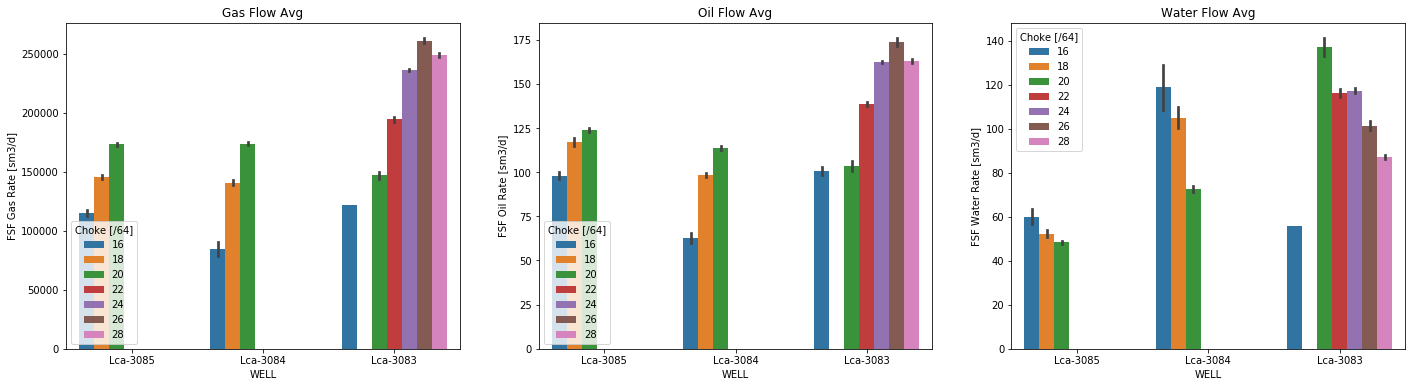

In [40]:
x1 = x.query('WELL == "Lca-3083"|WELL == "Lca-3084"|WELL == "Lca-3085"')

fig1, ax = plt.subplots(1,3,figsize=(24,6))
ax[0].set_title('Gas Flow Avg')
ax[1].set_title('Oil Flow Avg')
ax[2].set_title('Water Flow Avg')
sns.barplot(y='FSF Gas Rate [sm3/d]', x='WELL', data=x1, hue='Choke [/64]', orient='v' , ax=ax[0])
sns.barplot(y='FSF Oil Rate [sm3/d]', x='WELL', data=x1, hue='Choke [/64]', orient='v' , ax=ax[1])
sns.barplot(y='FSF Water Rate [sm3/d]', x='WELL', data=x1, hue='Choke [/64]', orient='v' , ax=ax[2])
plt.show()

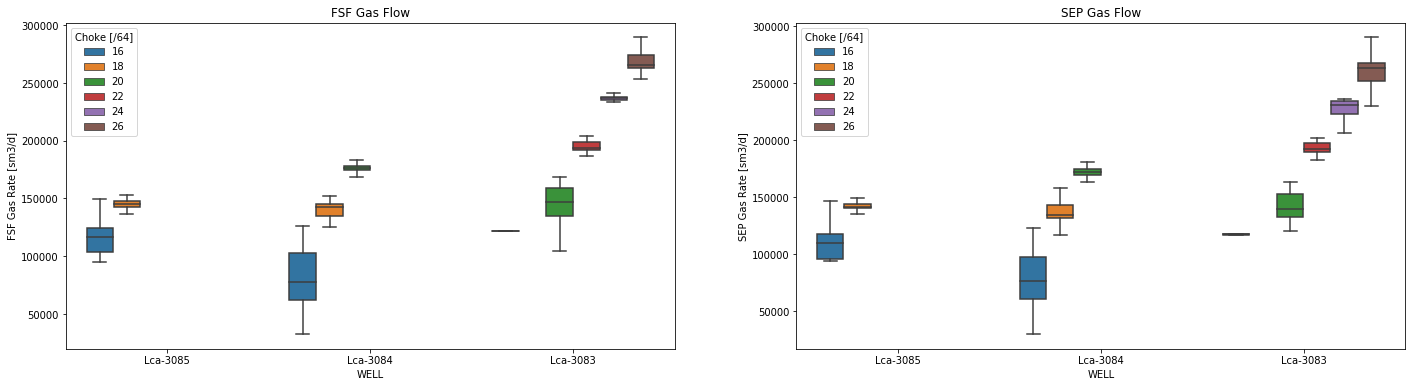

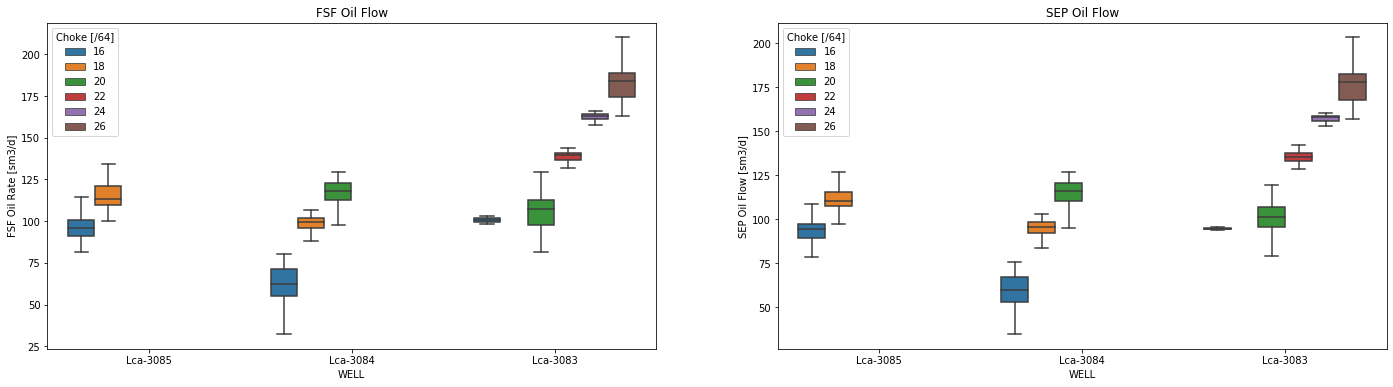

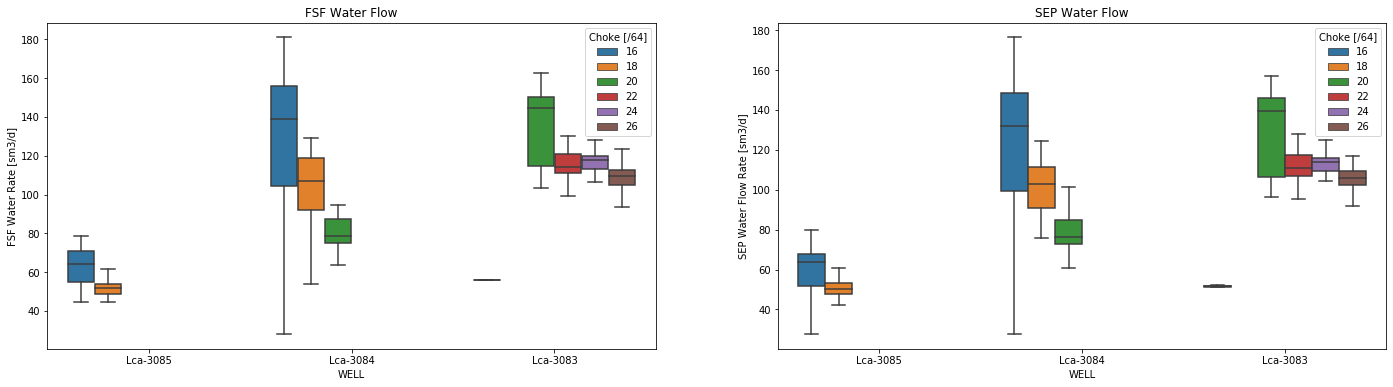

In [32]:
x1 = x.query('WELL == "Lca-3083"|WELL == "Lca-3084"|WELL == "Lca-3085"')
fig1, ax = plt.subplots(1,2,figsize=(24,6))

ax[0].set_title('FSF Gas Flow')
ax[1].set_title('SEP Gas Flow')
sns.boxplot(y='FSF Gas Rate [sm3/d]', x='WELL', data=x1, hue='Choke [/64]', orient='v' , ax=ax[0], showfliers=False)
sns.boxplot(y='SEP Gas Rate [sm3/d]', x='WELL', data=x1, hue='Choke [/64]', orient='v' , ax=ax[1], showfliers=False)
plt.show()
fig1, ax = plt.subplots(1,2,figsize=(24,6))
ax[0].set_title('FSF Oil Flow')
ax[1].set_title('SEP Oil Flow')
sns.boxplot(y='FSF Oil Rate [sm3/d]', x='WELL', data=x1, hue='Choke [/64]', orient='v' , ax=ax[0], showfliers=False)
sns.boxplot(y='SEP Oil Flow [sm3/d]', x='WELL', data=x1, hue='Choke [/64]', orient='v' , ax=ax[1], showfliers=False)
plt.show()
fig1, ax = plt.subplots(1,2,figsize=(24,6))
ax[0].set_title('FSF Water Flow')
ax[1].set_title('SEP Water Flow')
sns.boxplot(y='FSF Water Rate [sm3/d]', x='WELL', data=x1, hue='Choke [/64]', orient='v' , ax=ax[0], showfliers=False)
sns.boxplot(y='SEP Water Flow Rate [sm3/d]', x='WELL', data=x1, hue='Choke [/64]', orient='v' , ax=ax[1], showfliers=False)
plt.show()

In [12]:
ds_data[['FSF Line Press [Psig]',
       'FSF Line Temp [C]', 'FSF Gas Rate [sm3/d]', 'FSF Oil Rate [sm3/d]',
       'FSF Water Rate [sm3/d]', 'SEP Gas Rate [sm3/d]',
       'SEP Oil Flow [sm3/d]', 'SEP RAW Oil Flow [m3/d]',
       'SEP Water Flow Rate [sm3/d]']].corr()

,FSF Line Press [Psig],FSF Line Temp [C],FSF Gas Rate [sm3/d],FSF Oil Rate [sm3/d],FSF Water Rate [sm3/d],SEP Gas Rate [sm3/d],SEP Oil Flow [sm3/d],SEP RAW Oil Flow [m3/d],SEP Water Flow Rate [sm3/d]
FSF Line Press [Psig],1.000000,0.671781,0.352001,0.396362,0.316403,0.347500,0.397627,0.398910,0.316685
FSF Line Temp [C],0.671781,1.000000,0.706569,0.656787,0.596608,0.697056,0.653376,0.623023,0.596620
FSF Gas Rate [sm3/d],0.352001,0.706569,1.000000,0.940391,0.326793,0.991672,0.941665,0.924626,0.330943
FSF Oil Rate [sm3/d],0.396362,0.656787,0.940391,1.000000,0.310396,0.936298,0.996722,0.983951,0.312177
FSF Water Rate [sm3/d],0.316403,0.596608,0.326793,0.310396,1.000000,0.313322,0.299459,0.255644,0.997439
SEP Gas Rate [sm3/d],0.347500,0.697056,0.991672,0.936298,0.313322,1.000000,0.937678,0.921323,0.317637
SEP Oil Flow [sm3/d],0.397627,0.653376,0.941665,0.996722,0.299459,0.937678,1.000000,0.988025,0.301990
SEP RAW Oil Flow [m3/d],0.398910,0.623023,0.924626,0.983951,0.255644,0.921323,0.988025,1.000000,0.258203
SEP Water Flow Rate [sm3/d],0.316685,0.596620,0.330943,0.312177,0.997439,0.317637,0.301990,0.258203,1.000000


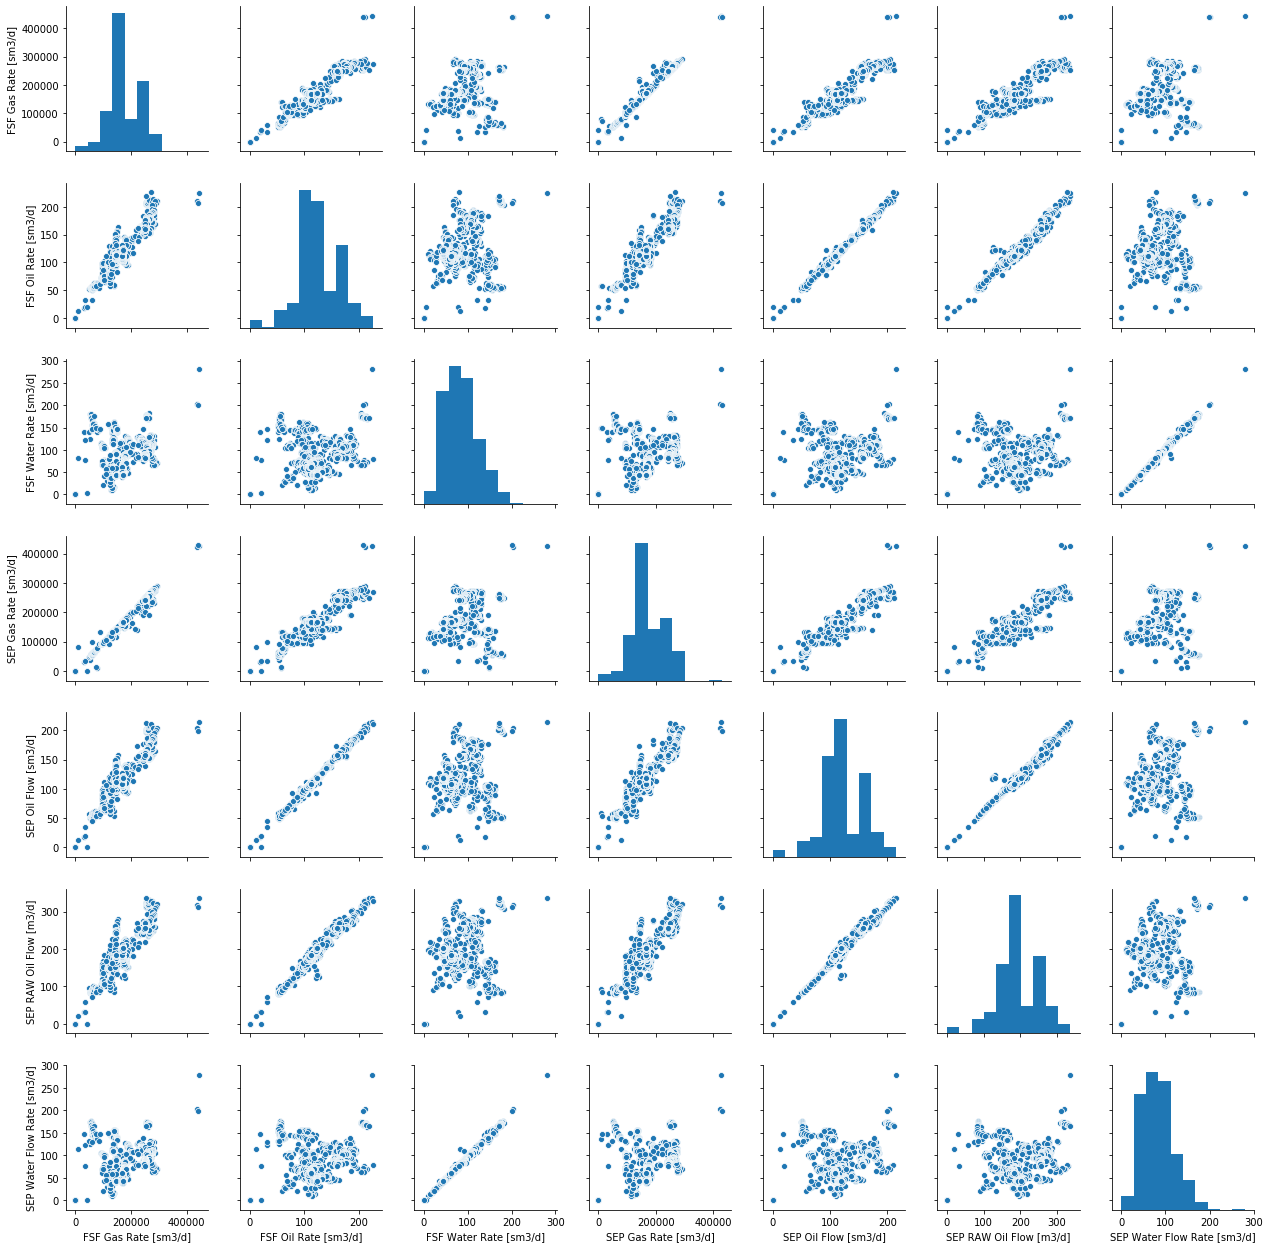

In [11]:
sns.pairplot(ds_data[['FSF Gas Rate [sm3/d]', 'FSF Oil Rate [sm3/d]',
       'FSF Water Rate [sm3/d]', 'SEP Gas Rate [sm3/d]',
       'SEP Oil Flow [sm3/d]', 'SEP RAW Oil Flow [m3/d]',
       'SEP Water Flow Rate [sm3/d]']])

In [97]:
ds_data.columns

Index(['DATE & TIME', 'WELL', 'Choke [/64]', 'FSF Line Press [Psig]',
       'FSF Line Temp [C]', 'FSF Gas Rate [sm3/d]', 'FSF Oil Rate [sm3/d]',
       'FSF RAW Oil Rate [m3/d]', 'FSF Water Rate [sm3/d]',
       'SEP Gas Rate Control Sm3/d', 'SEP Oil Flow  m3/d',
       'SEP RAW Oil Flow m3/d', 'SEP Water Flow Rate m3/d', 'Gas Flow Diff',
       'Oil Flow Diff', 'Water Flow Diff', 'well+choke'],
      dtype='object')

In [13]:
x['sep_oil_factor'] = x['SEP Oil Flow [sm3/d]'] / x['SEP RAW Oil Flow [m3/d]']
print(x['sep_oil_factor'].describe())

count    1364.000000
mean        0.625043
std         0.033594
min         0.540000
25%         0.610000
50%         0.630000
75%         0.640000
max         0.950000
Name: sep_oil_factor, dtype: float64


In [14]:
x['fsf_oil_factor'] = x['FSF Oil Rate [sm3/d]'] / x['FSF RAW Oil Rate [m3/d]']
print(x['fsf_oil_factor'].describe())

count    1364.000000
mean        0.640930
std         0.028878
min         0.593100
25%         0.630900
50%         0.634800
75%         0.636900
max         1.226400
Name: fsf_oil_factor, dtype: float64


In [26]:
ds = x.copy()

ds['DATE'] = pd.to_datetime(ds['DATE & TIME'])
#ds['Time-2'] = ds['Time'] - datetime.timedelta(hours=2)

ds['DATE'] = ds['DATE'].dt.strftime('%Y-%m-%d')
ds.head()
#ds1 = ds.copy()
ds1 = ds.groupby('DATE').mean()
ds1.head()

,FSF Line Press [Psig],FSF Line Temp [C],FSF Gas Rate [sm3/d],FSF Oil Rate [sm3/d],FSF RAW Oil Rate [m3/d],FSF Water Rate [sm3/d],FSF Liquid [sm3/d],SEP Gas Rate [sm3/d],SEP Oil Flow [sm3/d],SEP RAW Oil Flow [m3/d],...,Gas Flow Diff (abs),Liquid Flow Dif (abs),Oil Flow Diff (abs),Water Flow Diff (abs),Gas Flow Diff (tot),Liquid Flow Dif (tot),Oil Flow Diff (tot),Water Flow Diff (tot),sep_oil_factor,fsf_oil_factor
DATE,,,,,,,,,,,,,,,,,,,,,
2020-06-08,1401.950000,50.662000,104338.794000,85.746000,136.834999,71.826000,157.572000,94386.114000,81.880000,131.180977,...,0.105460,0.046666,0.047499,0.046679,0.105460,0.046666,0.047499,0.046679,0.624190,0.626646
2020-06-09,1401.969583,50.865833,103664.611667,86.312071,137.664516,72.211283,158.523354,95380.777500,83.139583,133.246540,...,0.086902,0.042353,0.042710,0.059611,0.086902,0.031582,0.039832,0.024958,0.624101,0.627041
2020-06-10,1394.827083,49.487083,103706.766250,92.830092,148.679123,68.132096,160.962187,96152.736667,92.243750,149.652435,...,0.078573,0.034109,0.042828,0.047605,0.078573,0.011263,0.009348,0.016250,0.616424,0.624372
2020-06-11,1395.481111,46.962222,80435.655506,76.854544,123.536312,103.537467,180.392011,76644.677778,75.426667,123.763240,...,0.053136,0.034161,0.054624,0.045046,0.052354,0.020272,0.020767,0.027343,0.608333,0.619486
2020-06-12,1380.416364,49.987727,61038.650311,53.458566,85.612078,156.332732,209.791298,58568.664953,52.191818,85.266831,...,0.043065,0.031384,0.044832,0.032111,0.042541,0.028468,0.026957,0.029656,0.611818,0.624367


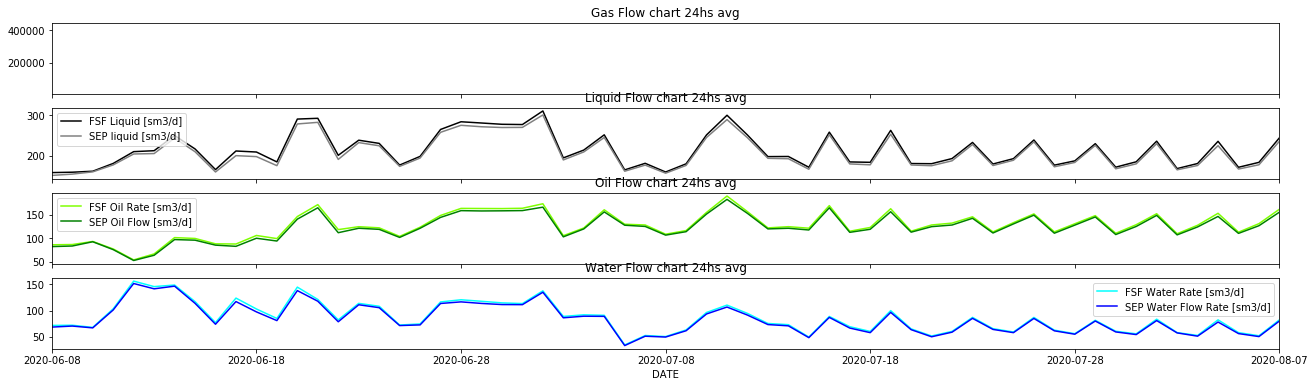

In [41]:
fig, ax = plt.subplots(4,figsize=(22,6),sharex=True)
#ds1.plot(y=['FSF Gas Rate [sm3/d]','SEP Gas Rate [sm3/d]'], color=['orange','red'],ax=ax[0])
ax[0].scatter(x['FSF Gas Rate [sm3/d]'],x['SEP Gas Rate [sm3/d]'])
ds1.plot(y=['FSF Liquid [sm3/d]','SEP liquid [sm3/d]'],color=['black','gray'],ax=ax[1])
ds1.plot(y=['FSF Oil Rate [sm3/d]','SEP Oil Flow [sm3/d]'], color=['chartreuse','green'],ax=ax[2])
ds1.plot(y=['FSF Water Rate [sm3/d]','SEP Water Flow Rate [sm3/d]'],color=['aqua','blue'],ax=ax[3])
ax[0].set(title="Gas Flow chart 24hs avg")
ax[1].set(title="Liquid Flow chart 24hs avg")
ax[2].set(title="Oil Flow chart 24hs avg")
ax[3].set(title="Water Flow chart 24hs avg")
plt.show()